Se importan las librerias que utilziaremos a lo largo del procesamiento de datos, con respecto a la geolocalización. 
Se manejan dos librerias importantes para poder hacer este tratamiento:

- Geopandas:Sera la libreria que usaremos para leer archivos de mapas, ademas de que se peuden hacer otras transformaciones del tipo, utilizar API's para obtener la informacion de direcciónes, generación de polígonos con base a las coordenadas, utilziar el mapa para obtener informacion de un lugar con base a unas busqueda, etc.
- Folium: Una libreria que nos permitira realizar representaciones de mapas de forma interactiva.

In [1]:
 %matplotlib inline
import geopandas as gpd
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

En esta celda se utiliza la llibreria de geopandas, con la finalidad de importar el mapa de la Ciudad de México, el cual se obtiene de los datos abiertos del gobierno. El archivo en un tipo .zip, el cual contiene 4 archivos, que tal como se obsersa al imprimir la informacion, contiene los datos completos correspondientes a las delegaciones y alcandias, así como la columna "geometry", que contiene la información necesaria para la impresión del mapa.
-https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/export/

In [2]:
# Read in the data
full_data = gpd.read_file("coloniascdmx.shp")

# View the first five rows of the data
full_data.head()

,nombre,entidad,cve_alc,alcaldia,cve_col,secc_com,secc_par,geometry
0,LOMAS DE REFORMA,9.0,16.0,MIGUEL HIDALGO,16-043,"4971, 4983",None,"POLYGON ((-99.23597616387184 19.4050972323355,..."
1,DANIEL GARZA (AMPL),9.0,16.0,MIGUEL HIDALGO,16-025,"4951, 4952, 4953","4957, 4959, 4960, 4973, 4990",POLYGON ((-99.19324715816437 19.41381986872523...
2,IGNACIO MANUEL ALTAMIRANO,9.0,16.0,MIGUEL HIDALGO,16-034,None,5110,POLYGON ((-99.19666799854315 19.46486366846163...
3,LEGARIA,9.0,16.0,MIGUEL HIDALGO,16-036,5046,"5038, 5045, 5058",POLYGON ((-99.19050704294594 19.45879438214508...
4,LEGARIA (U HAB),9.0,16.0,MIGUEL HIDALGO,16-037,None,"5069, 5070",POLYGON ((-99.20241766872664 19.45060708861556...


Se quiere graficar sobre el mapa de la Ciduad de México las estaciones de ECOBICI que hay en la Ciudad, por lo que se utilizara el csv de stations, que posee la información, tanto de las coordenadas como del nombre de las mismas.

In [3]:
estaciones=pd.read_csv("stations.csv")
estaciones

,id,lat,lon,name
0,1,19.433571,-99.167809,1 RIO SENA-RIO BALSAS
1,2,19.431386,-99.171695,2 RIO GUADALQUIVIR-RIO BALSAS
2,3,19.431655,-99.158668,3 REFORMA-INSURGENTES
3,4,19.428309,-99.171713,4 RIO NILO-RIO PANUCO
4,5,19.429720,-99.169363,5 RIO PANUCO-RIO TIBER
...,...,...,...,...
475,476,19.442127,-99.184433,476 LAGO COMO-LAGUNA DE MAYRÁN
476,477,19.440905,-99.181743,477 LAGO ISEO-LAGUNA DE MAYRÁN
477,478,19.440818,-99.176961,478 LAGUNA DE MAYRÁN-LAGO CHALCO
478,479,19.444433,-99.179664,E479 LAGO MURITZ-AV. MARINA NACIONAL


Al observar el tipo de archivo de dato correspondiente a el mapa, se observa que es un archivo tipo GeoDataFrame y al imprimirlo, usando matplotlib, se puede apreciar que corresponde como se preeveia, al mapa de la ciudad. Aunado a esto, observamos en los axis, que corresponden a las coordenadas.

In [22]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

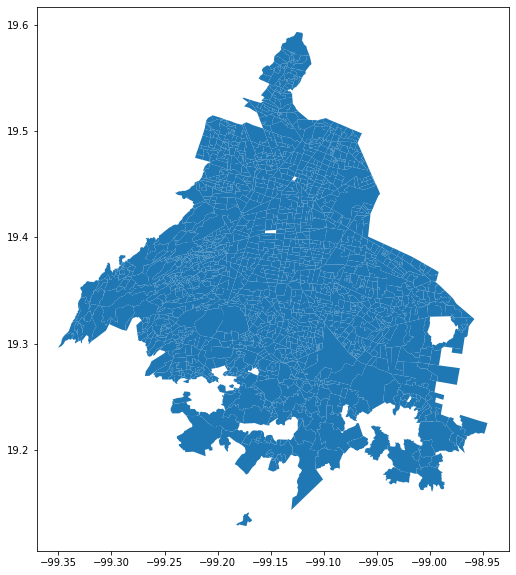

In [4]:

full_data.plot(figsize=(10,10))


In [24]:
print(full_data.crs)

{'init': 'epsg:4326'}


Se realiza la gráfica correspondiente a los puntos de las estaciones de las ECOBICIS.

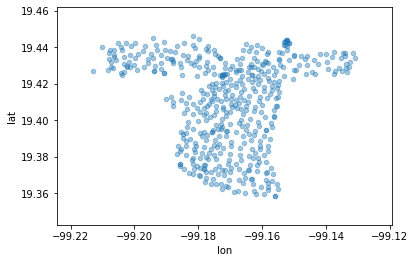

In [23]:
estaciones.plot(kind="scatter", x="lon", y="lat", alpha=0.4)

Se realiza el ploteo correspondiente de las estaciones de la ECOBICI, sobre el GeopandasDataframe de la Ciduad de México, haciendo uso de las coordenadas del csv. 

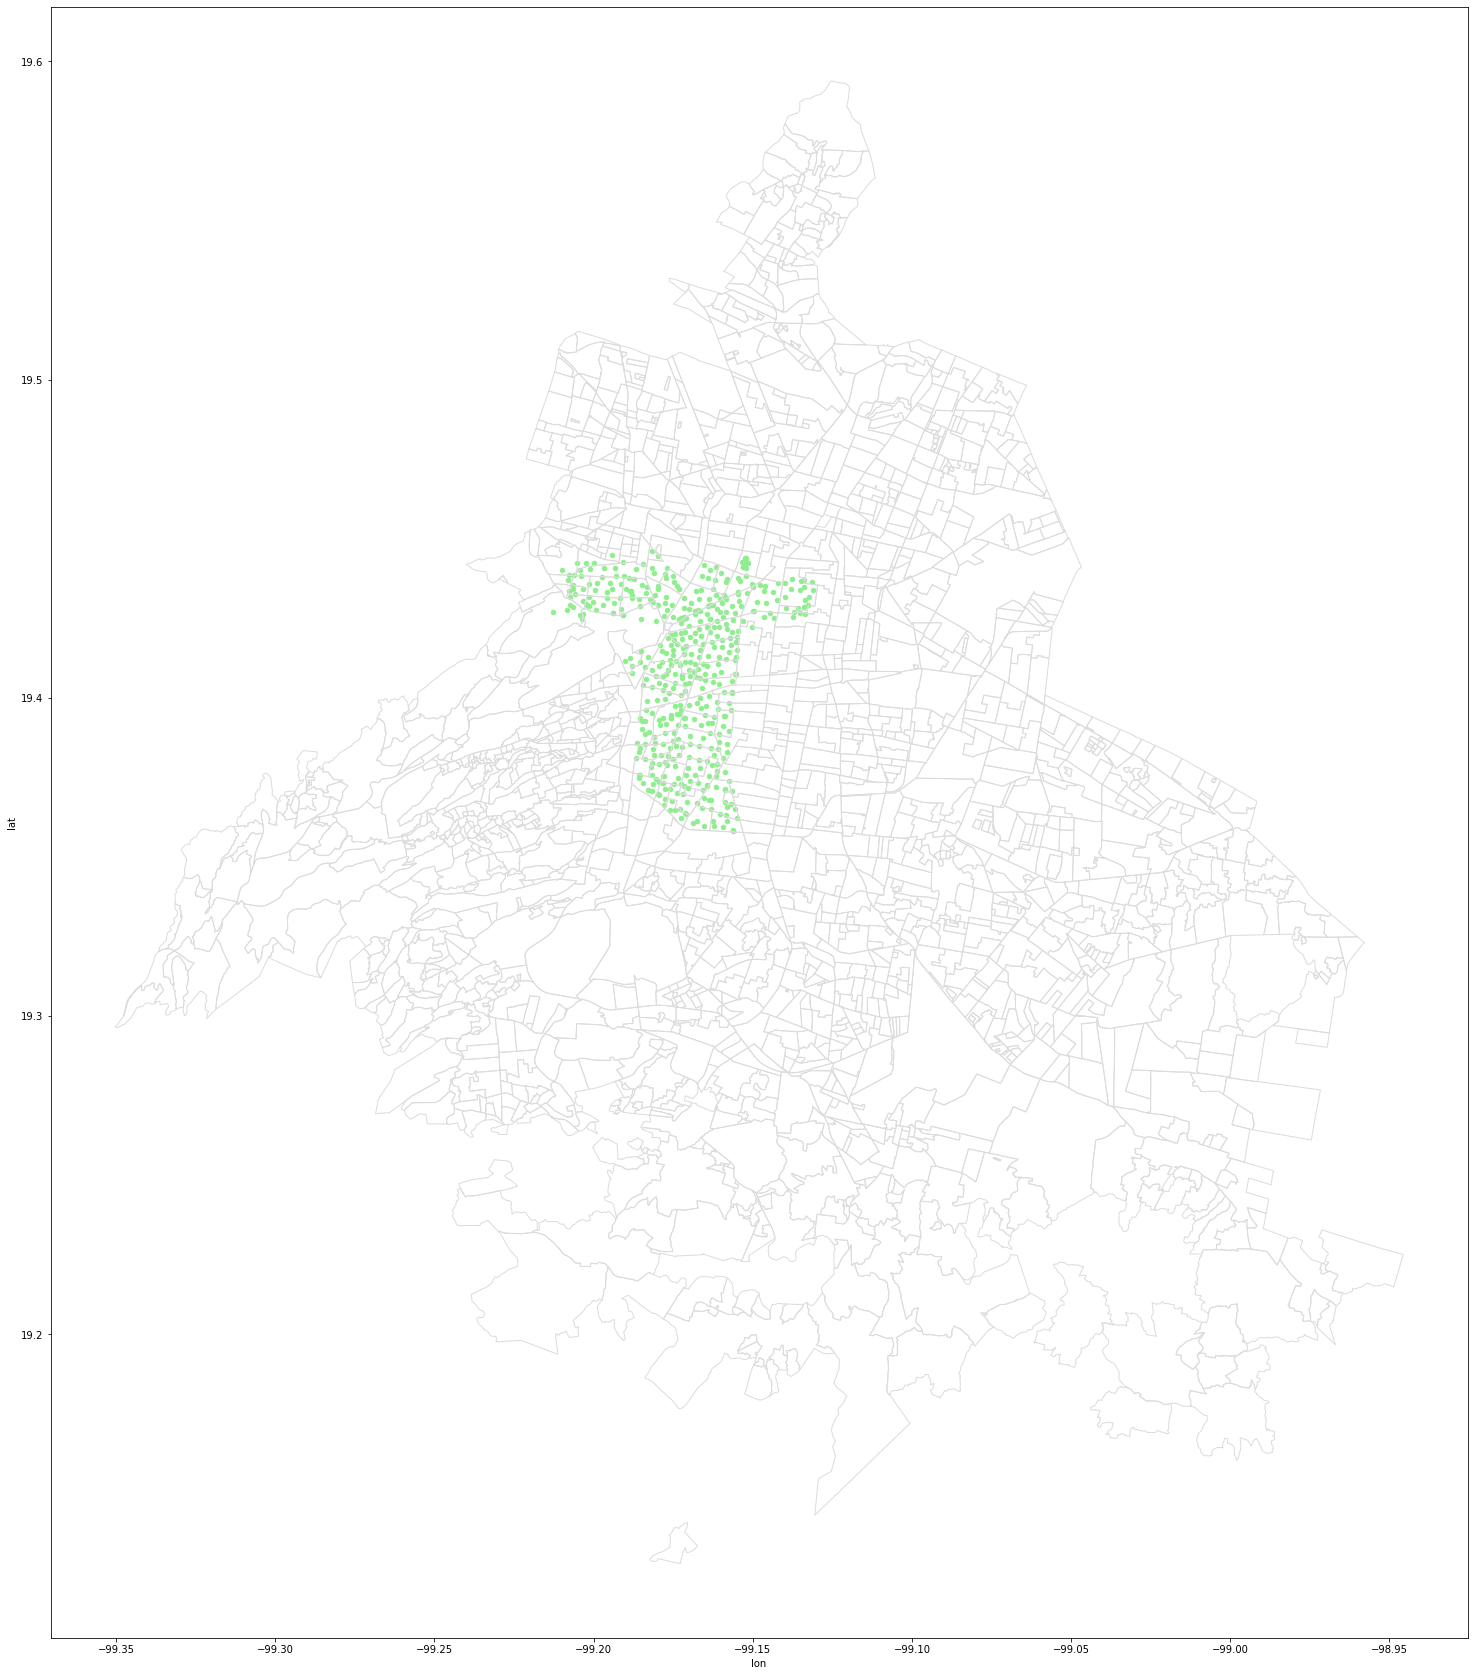

In [6]:
ax = full_data.plot(figsize=(30,30), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
estaciones.plot(kind="scatter", x="lon", y="lat",color='lightgreen', ax=ax)

Se obtienen los valores máximos y mínimos correspondientes a las estaciones, con la finalidad de poder utilziar estos datos, en las representaciones que se realizarán posteriormente.

In [28]:
print(estaciones[["lat","lon"]].max())
print(estaciones[["lat","lon"]].min())

lat    19.446073
lon   -99.130918
dtype: float64
lat    19.358270
lon   -99.212845
dtype: float64


Se define una funcion nombrada embed_map, la cual recibe dos variables como parámetros, las cuales son el archivo del mapa, definido por la libreria de folium y el nombre del mismo. 
Con estas dos variables y con la libreria de Ipython junto con la de IFrame, podremos generar un archivo,  que se presente de forma embebida, dentro del reporte, generando y vizualizando los mapas que buscaremos representar.

In [8]:
# Function for displaying the map
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [25]:
import os
report_path = "D:/documentos/cv/nuevo/CervantesVarelaJoseLuis_Eng.pdf"
rel_report_path = os.path.relpath(report_path)
from IPython.display import IFrame    
IFrame(rel_report_path, width=900, height=650)

Creamos con la libreria folium un mapa, el cual asignando las coordenadas que anteriormente obtuvimos con el máximo y  mínimo, posteriormente iteramossobre el archivo de las estaciones para obtener cada una de las marcas de las estaciones.
Finalmente mandamos llamar la funcion que presentara el mapa.

In [30]:
# Create a map
m_1 = folium.Map(location=[19.446073,-99.130918], tiles='openstreetmap', zoom_start=12)

for idx, row in estaciones.iterrows():
    Marker([row['lat'], row['lon']]).add_to(m_1)

# Display the map
embed_map(m_1, 'm_1.html')

Se repite el proceso realizado anteriormente, con la diferencia de que se define un objeto de la clase MarkerCluster, el cual nos ayudara a ir apilando 

In [30]:
m_2 = folium.Map(location=[19.446073,-99.130918], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in estaciones.iterrows():
    if not math.isnan(row['lon']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['lon']]))
m_2.add_child(mc)

# Display the map
embed_map(m_2, 'm_2.html')

In [63]:
# Create a base map
m_5 = folium.Map(location=[19.446073,-99.130918], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=estaciones[['lat', 'lon']], radius=10).add_to(m_5)

# Display the map
embed_map(m_5, 'm_5.html')

In [11]:
districts = full_data[["alcaldia", "geometry"]].set_index("alcaldia")
districts.tail()

,geometry
alcaldia,
COYOACAN,"POLYGON ((-99.1758794218956 19.34407062587703,..."
COYOACAN,POLYGON ((-99.17837229114286 19.30633825389837...
COYOACAN,POLYGON ((-99.17369080668296 19.30847129826656...
COYOACAN,POLYGON ((-99.13038098396862 19.34034667226214...
VENUSTIANO CARRANZA,POLYGON ((-99.11530800257714 19.43193232430346...


In [12]:
districts2 = full_data[["alcaldia", "geometry"]].copy()#.set_index("alcaldia")
districts.tail()

,geometry
alcaldia,
COYOACAN,"POLYGON ((-99.1758794218956 19.34407062587703,..."
COYOACAN,POLYGON ((-99.17837229114286 19.30633825389837...
COYOACAN,POLYGON ((-99.17369080668296 19.30847129826656...
COYOACAN,POLYGON ((-99.13038098396862 19.34034667226214...
VENUSTIANO CARRANZA,POLYGON ((-99.11530800257714 19.43193232430346...


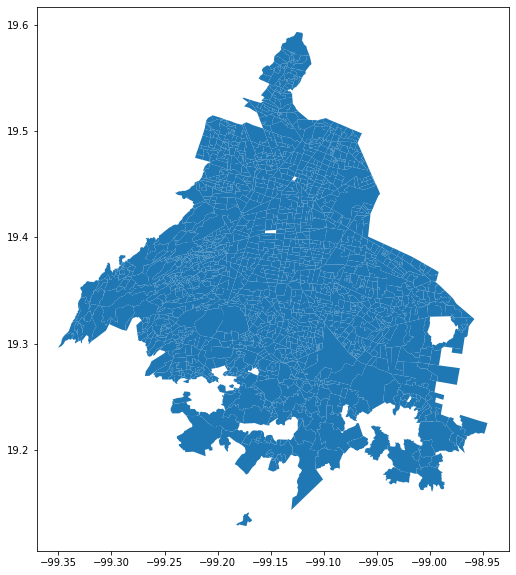

In [35]:
districts.plot(figsize=(10,10))

In [68]:
plot_dict = full_data.alcaldia.value_counts()
type(plot_dict)

pandas.core.series.Series

In [21]:
# Create a base map
m_6 = folium.Map(location=[19.446073,-99.130918], tiles='cartodbpositron', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=points_fix.__geo_interface__, 
           data=estaciones,
           key_on="feature.id", 
           fill_color='YlGnBu' 
           #legend_name='Ecobici estaciones alcaldia'
          ).add_to(m_6)

# Display the map
embed_map(m_6, 'm_6.html')

In [13]:
points_fix = districts2.loc[districts2.is_valid]

In [14]:
points_fix.set_index("alcaldia")

,geometry
alcaldia,
MIGUEL HIDALGO,"POLYGON ((-99.23597616387184 19.4050972323355,..."
MIGUEL HIDALGO,POLYGON ((-99.19324715816437 19.41381986872523...
MIGUEL HIDALGO,POLYGON ((-99.19666799854315 19.46486366846163...
MIGUEL HIDALGO,POLYGON ((-99.19050704294594 19.45879438214508...
MIGUEL HIDALGO,POLYGON ((-99.20241766872664 19.45060708861556...
...,...
COYOACAN,"POLYGON ((-99.1758794218956 19.34407062587703,..."
COYOACAN,POLYGON ((-99.17837229114286 19.30633825389837...
COYOACAN,POLYGON ((-99.17369080668296 19.30847129826656...


In [103]:
points_fix

,alcaldia,geometry
0,MIGUEL HIDALGO,"POLYGON ((-99.23597616387184 19.4050972323355,..."
1,MIGUEL HIDALGO,POLYGON ((-99.19324715816437 19.41381986872523...
2,MIGUEL HIDALGO,POLYGON ((-99.19666799854315 19.46486366846163...
3,MIGUEL HIDALGO,POLYGON ((-99.19050704294594 19.45879438214508...
4,MIGUEL HIDALGO,POLYGON ((-99.20241766872664 19.45060708861556...
...,...,...
1807,COYOACAN,"POLYGON ((-99.1758794218956 19.34407062587703,..."
1808,COYOACAN,POLYGON ((-99.17837229114286 19.30633825389837...
1809,COYOACAN,POLYGON ((-99.17369080668296 19.30847129826656...
1810,COYOACAN,POLYGON ((-99.13038098396862 19.34034667226214...


In [102]:
merged = points_fix.set_index('alcaldia').join(plot_dict.set_index('alcaldia'))
merged.head()

KeyError: "None of ['alcaldia'] are in the columns"

In [107]:
merged = points_fix.merge(plot_dict, left_on='alcaldia', right_on='alcaldia')
merged

,alcaldia,geometry,nombre
0,MIGUEL HIDALGO,"POLYGON ((-99.23597616387184 19.4050972323355,...",88
1,MIGUEL HIDALGO,POLYGON ((-99.19324715816437 19.41381986872523...,88
2,MIGUEL HIDALGO,POLYGON ((-99.19666799854315 19.46486366846163...,88
3,MIGUEL HIDALGO,POLYGON ((-99.19050704294594 19.45879438214508...,88
4,MIGUEL HIDALGO,POLYGON ((-99.20241766872664 19.45060708861556...,88
...,...,...,...
1803,MILPA ALTA,POLYGON ((-98.99193374421287 19.19552235882943...,12
1804,MILPA ALTA,POLYGON ((-99.04409893729347 19.21656893163049...,12
1805,MILPA ALTA,"POLYGON ((-99.0302941026096 19.18168069765098,...",12
1806,MILPA ALTA,POLYGON ((-99.01694082330947 19.19372618385547...,12


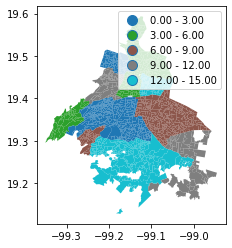

In [16]:
ax = points_fix.dropna().plot(column='alcaldia', scheme='equal_interval', legend=True)

In [65]:
plot_dict=pd.DataFrame(plot_dict)

In [106]:
plot_dict = full_data.groupby('alcaldia').count()
#plot_dict.reset_index()
#plot_dict = plot_dict[["alcaldia","nombre"]]
plot_dict = plot_dict[["nombre"]].copy()
plot_dict.reset_index()
plot_dict.rename(columns={'nombre': 'count'})


,count
alcaldia,
ALVARO OBREGON,249
AZCAPOTZALCO,111
BENITO JUAREZ,64
COYOACAN,153
CUAJIMALPA DE MORELOS,43
CUAUHTEMOC,64
GUSTAVO A. MADERO,232
IZTACALCO,55
IZTAPALAPA,293


In [4]:
import geopy